In [35]:
import numpy as np
import pandas as pd
from protein_encoding import PC_6, read_fasta
from model_tools import split, show_train_history, metric_array
from Influ_model_edit import train_model
from sklearn.utils import shuffle
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LeakyReLU

In [36]:
# set gpu
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [37]:
# load train data
# PC6 encoding
Influ_AVP_data = PC_6('../data/AVP4Influ.fasta', length=50)
non_influ_AVP_data = PC_6('../data/combined_16995_negativeset.fasta', length=50)

In [38]:
# dict to np array
AVP_array= np.array(list(Influ_AVP_data.values()))
non_AVP_array = np.array(list(non_influ_AVP_data.values()))

In [39]:
import random
non_AVP_array = random.sample(list(non_AVP_array), len(AVP_array))

In [40]:
# feature & labels (0:non_AVP, 1:AVP)
features = np.concatenate((non_AVP_array,AVP_array),axis=0)
labels = np.hstack((np.repeat(0, len(non_AVP_array)),np.repeat(1, len(AVP_array))))

In [41]:
# train validation split
train_data, val_data, train_labels, val_labels = split(features, labels , save = False, random_state = 1)

In [42]:
# shuffle
train_data, train_labels = shuffle(train_data, train_labels, random_state=0)
val_data, val_labels = shuffle(val_data, val_labels, random_state=0)

In [43]:
# model training
model, history = train_model(train_data,train_labels,val_data,val_labels,'Influ_PC_6_model_n', path='./')

Epoch 1/500
13/13 [==============================] - ETA: 0s - loss: 10.1165 - accuracy: 0.5000
Epoch 00001: val_loss improved from inf to 1.60722, saving model to ././Influ_PC_6_model_n_best_weights.h5
13/13 [==============================] - 5s 89ms/step - loss: 10.1165 - accuracy: 0.5000 - val_loss: 1.6072 - val_accuracy: 0.5000 - lr: 2.0000e-04
Epoch 2/500
12/13 [==========================>...] - ETA: 0s - loss: 9.6124 - accuracy: 0.4917
Epoch 00002: val_loss did not improve from 1.60722
13/13 [==============================] - 0s 23ms/step - loss: 9.4691 - accuracy: 0.5000 - val_loss: 1.6181 - val_accuracy: 0.5000 - lr: 2.0000e-04
Epoch 3/500
11/13 [========================>.....] - ETA: 0s - loss: 8.9681 - accuracy: 0.5091
Epoch 00003: val_loss did not improve from 1.60722
13/13 [==============================] - 0s 24ms/step - loss: 9.0692 - accuracy: 0.5000 - val_loss: 1.6448 - val_accuracy: 0.5000 - lr: 2.0000e-04
Epoch 4/500
11/13 [========================>.....] - ETA: 0s - 

In [44]:
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

Layer 0: input_3, Trainable: True
Layer 1: conv1d_8, Trainable: True
Layer 2: batch_normalization_8, Trainable: True
Layer 3: dropout_4, Trainable: True
Layer 4: conv1d_9, Trainable: True
Layer 5: batch_normalization_9, Trainable: True
Layer 6: conv1d_10, Trainable: True
Layer 7: batch_normalization_10, Trainable: True
Layer 8: conv1d_11, Trainable: True
Layer 9: batch_normalization_11, Trainable: True
Layer 10: dropout_5, Trainable: False
Layer 11: global_max_pooling1d_2, Trainable: False
Layer 12: dense_2, Trainable: False


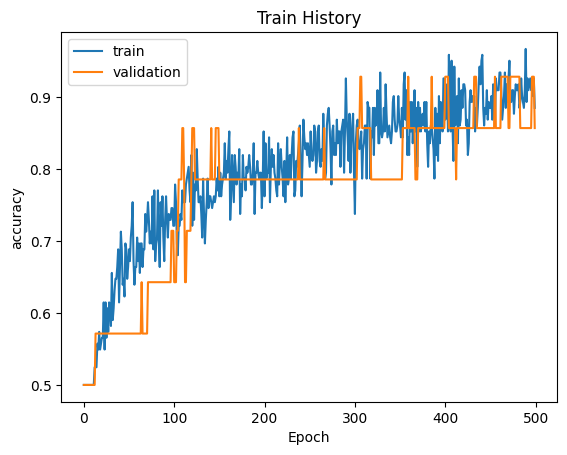

In [45]:
show_train_history(history ,'accuracy','val_accuracy')

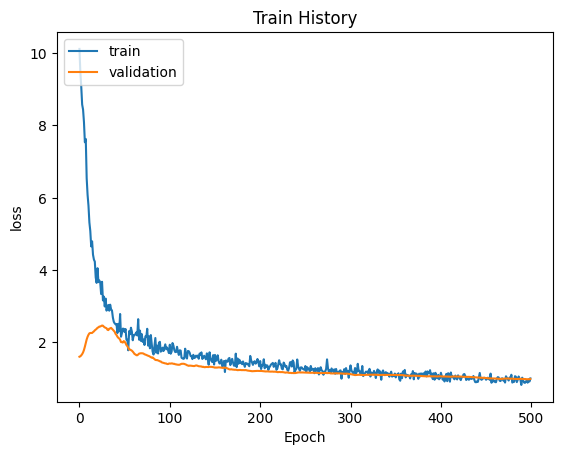

In [46]:
show_train_history(history ,'loss','val_loss')

In [47]:
# load best model
activation=tensorflow.keras.layers.LeakyReLU()
model = load_model('Influ_PC_6_model_n_best_weights.h5')

In [48]:
# validate
metric_array(val_data, val_labels, model)

{'accuracy': 0.9285714285714286,
 'precision': 1.0,
 'sensitivity': 0.8571428571428571,
 'specificity': 1.0,
 'f1': 0.923076923076923,
 'mcc': 0.8660254037844387}

In [49]:
# load testing data
test_AVP_data = PC_6('../data/Influ_pos_val.fasta', length=50)
test_non_AVP_data = PC_6('../data/2neg_testing_uniprot_random_combined_17.fasta', length=50)
test_AVP_array= np.array(list(test_AVP_data.values()))
test_non_AVP_array = np.array(list(test_non_AVP_data.values()))

In [50]:
# feature & labels
test_features = np.concatenate((test_non_AVP_array,test_AVP_array),axis=0)
test_labels = np.hstack((np.repeat(0, len(test_non_AVP_array)),np.repeat(1, len(test_AVP_array))))

In [51]:
# testing
metric_array(test_features, test_labels, model)

{'accuracy': 0.8235294117647058,
 'precision': 0.9230769230769231,
 'sensitivity': 0.7058823529411765,
 'specificity': 0.9411764705882353,
 'f1': 0.8000000000000002,
 'mcc': 0.6657502859356826}